In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, HuberRegressor, RANSACRegressor, TheilSenRegressor
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

# Animal Welfare Center dataset

In [3]:
original_data = pd.read_csv("kaggle_files/animal_welfare_center.csv")

In [4]:
data = original_data.copy()

In [5]:
data.head()

,animal_id_outcome,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,age_upon_outcome,date_of_birth,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,outcome_type
0,A006100,2007,7,10 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194,10 years,2007-07-09 00:00:00,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,Thursday,0,1.0,Return to Owner
1,A006100,2007,7,7 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,1,2555,7.0,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722,7 years,2007-07-09 00:00:00,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,Return to Owner
2,A006100,2007,7,6 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,1,2190,6.0,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889,6 years,2007-07-09 00:00:00,Neutered Male,2190,6.0,"(5.0, 7.5]",NaN,3,2014,2014-03,Saturday,17,3.0,Return to Owner
3,A047759,2004,4,10 years,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139,10 years,2004-04-02 00:00:00,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,Missing
4,A134067,1997,10,16 years,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,1,5840,16.0,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444,16 years,1997-10-16 00:00:00,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,Saturday,11,1.0,Return to Owner


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47803 entries, 0 to 47802
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   animal_id_outcome           47803 non-null  object 
 1   dob_year                    47803 non-null  int64  
 2   dob_month                   47803 non-null  int64  
 3   age_upon_intake             47803 non-null  object 
 4   animal_type                 47803 non-null  object 
 5   breed                       47803 non-null  object 
 6   color                       47803 non-null  object 
 7   intake_condition            47803 non-null  object 
 8   intake_type                 47803 non-null  object 
 9   sex_upon_intake             47802 non-null  object 
 10  count                       47803 non-null  int64  
 11  age_upon_intake_(days)      47803 non-null  int64  
 12  age_upon_intake_(years)     47803 non-null  float64
 13  age_upon_intake_age_group   478

## Data Cleaning

In [7]:
# List of columns that have unnecessary/redundant information
drop_columns = ["age_upon_intake", "count", "age_upon_intake_(days)", "intake_datetime", "time_in_shelter",
                "intake_monthyear" , "age_upon_outcome", "date_of_birth", "age_upon_outcome_(days)",
                "sex_upon_outcome", "age_upon_intake_age_group", "age_upon_outcome_age_group",
                "outcome_datetime", "outcome_monthyear", "outcome_number", "intake_hour", "outcome_hour"]

In [8]:
# select numerical features for correlations
numerical = data.select_dtypes(np.number)

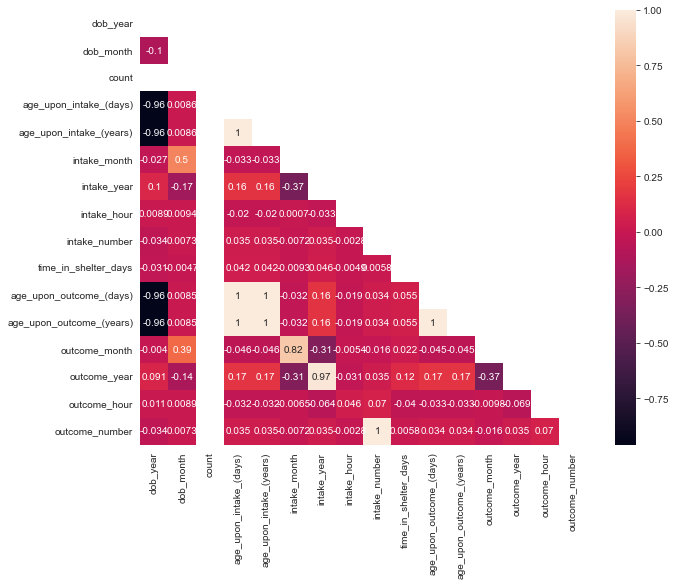

In [9]:
correlations = numerical.corr() # create the correlations

mask = np.zeros_like(correlations) # create an array with size of correlations

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations, mask=mask, annot=True)
plt.show()

#### Outcome and income values are almost the same because the duration that animals spent at the center are short, therefore high correlations. More columns need to be dropped.

In [10]:
# Dropping more columns after reducing the data
drop_columns.extend(["dob_year", "age_upon_outcome_(days)", "age_upon_outcome_(years)", "outcome_year"]) # use extend([]) instead of multiple append()

In [11]:
len(data.animal_id_outcome.unique())/len(data)

0.8928100746815053

#### The data has multiple entries for the same animal. About 89% of our data are unique animals. Enough data will remain after removing the duplicate intakes. The duplicates will be dropped.

In [12]:
# Remove duplicate rows for same animal
data = data[data['intake_number']== 1]

In [13]:
# now useless columns
drop_columns.extend(["animal_id_outcome", "intake_number"]) # use extend([]) instead of multiple append()

data = data.drop(columns=drop_columns)                      # dropping unnecessary columns

In [14]:
# Change column names for better understanding
data.rename(columns={'age_upon_intake':'age(years)',
                        "sex_upon_intake" : "sex"}, inplace=True)

In [15]:
# Exploring the values in our data to look for values that are unclear
for i in data.columns:
        print("------------------------")
        x = data[i].value_counts()
        print(x)

------------------------
4     4647
3     4256
5     4136
10    3627
6     3545
8     3527
7     3472
9     3386
1     3105
12    3084
2     3041
11    2865
Name: dob_month, dtype: int64
------------------------
Dog      23873
Cat      16192
Other     2454
Bird       172
Name: animal_type, dtype: int64
------------------------
Domestic Shorthair Mix                         12758
Pit Bull Mix                                    2990
Chihuahua Shorthair Mix                         2676
Labrador Retriever Mix                          2083
Domestic Medium Hair Mix                        1218
                                               ...  
Labrador Retriever/English Springer Spaniel        1
Pomeranian/Jack Russell Terrier                    1
Golden Retriever/Australian Shepherd               1
Jack Russell Terrier/Miniature Schnauzer           1
Mastiff/Bloodhound                                 1
Name: breed, Length: 1847, dtype: int64
------------------------
Black/White            

In [16]:
# What animals have these Unknown values
# no_sex = data[data["sex"]=="Unknown"]
# no_sex.animal_type.value_counts()

In [17]:
no_age = data[data["age_upon_intake_(years)"]==0]                              # select data where age is 0
# print(no_age[no_age.dob_month - no_age.intake_month])
no_age_list= list(no_age[(no_age.dob_month - no_age.intake_month ) >0 ].index) # get list of those indices 
data.loc[no_age_list, "dob_month"] = data["dob_month"] - 1                     # reduce dob_month by 1 to match intake_month

#### The zeros in the "age_upon_intake_(years)" are not missing values, they indicate a very young (or new born) animal at the Center. Some wrong values were cleaned.

In [18]:
data["sex"] = data['sex'].replace('Unknown', np.NaN)  # Replacing "Unknown" strings with Nans

In [19]:
data.sex.value_counts(dropna =False)/len(data) # How much of the data are NaNs now?

Intact Male      0.309995
Intact Female    0.289827
Neutered Male    0.165515
Spayed Female    0.145698
NaN              0.088965
Name: sex, dtype: float64

#### With around 9% of our data being NaNs we will not drop them, instead we will fill the missing values randomly with values from that column.

In [20]:
def random_nans(df, col):                                   # take the dataframe and the specified column
    print("NaNs before:", df[col].isna().sum())             # sanity check for NaNs before removing
    
    x = df.copy()                                           # copy dataframe for mask
    mask = df[col].isna()                                   # create the mask correlating to NaNs
    sexes = df[col].dropna().unique()                       # get unique entries in specified column
    
    x.loc[mask, col] = random.choices(sexes, k=mask.sum())    # apply mask to copied dataframe and replace NaNs 
                                                                                 # with random entries from the list
    print("NaNs after:" , x[col].isna().sum())              # sanity check for NaNs after removing
    return x

In [21]:
data = random_nans(data, "sex")

NaNs before: 3798
NaNs after: 0


In [22]:
def group_by_value(data,col,num,rename):                         # take 4 arguments: dataframe, column to modify,
                                                                 # cut of number and string u want to rename the NaNs to
    data2 = data.copy()
    
    breed1 = pd.DataFrame([data2[col].value_counts()<num]).T     # select dataframe where column has values less than specified
    mask1 = breed1.loc[breed1[col]==True].index                  # create mask with index of selected data
    df1 = data2[data2[col].isin(mask1)]                          # create dataframe with mask
    df1[col] = rename                                            # rename all entries in column

    #similar to code above, this time with values >= to specified number
    breed2 = pd.DataFrame([data2[col].value_counts()>=num]).T
    mask2 = breed2.loc[breed2[col]==True].index
    df2 = data2[data2[col].isin(mask2)]

    df = pd.concat([df1,df2] , axis = 0)                          # Combine modified dataframe with unmodified 
    
    print("The", col, "column now has", len(df[col].value_counts()), "unique entries")
    return df

In [23]:
data = group_by_value(data, "breed", 100, "Other")
data = group_by_value(data,"color", 120, "Other")

The breed column now has 50 unique entries
The color column now has 53 unique entries


In [24]:
data = data.reset_index(drop=True)

## Data Exploration

dob_month


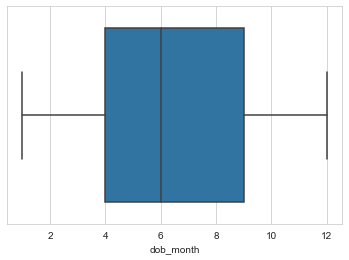

age_upon_intake_(years)


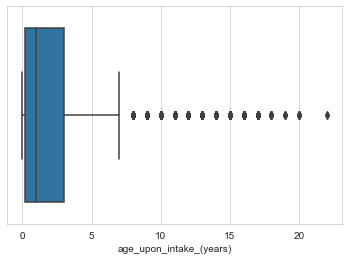

intake_month


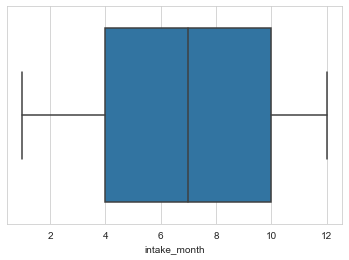

intake_year


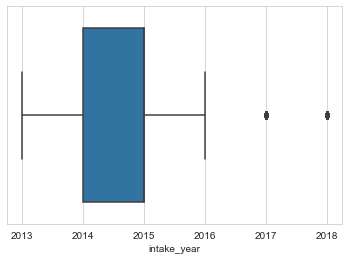

time_in_shelter_days


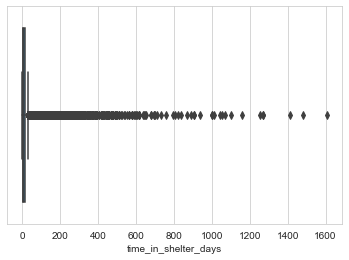

outcome_month


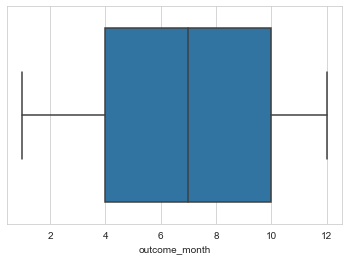

In [25]:
# iterate over all numerical columns and show the boxplot for each
numerical = data.select_dtypes(np.number)
for item in numerical.columns: 
    print(item)
    sns.boxplot(x = numerical[item])
    plt.show()

#### The data has a lot of outliers, we will analyze the importance of these outliers and work with two datasets for now.

In [26]:
iqr = np.percentile(data["time_in_shelter_days"], 75) - np.percentile(data["time_in_shelter_days"], 25)
upper_limit = np.percentile(data["time_in_shelter_days"], 75) + 1.5 * iqr
lower_limit = np.percentile(data["time_in_shelter_days"], 25) - 1.5 * iqr

mask_outlier = (data.time_in_shelter_days > upper_limit) | (data.time_in_shelter_days < lower_limit) # condition of being an outlier
mask_not_outlier = ( data.time_in_shelter_days <= upper_limit) & (data.time_in_shelter_days >= lower_limit) # condition of not not being outlier 
outliers_time_in_shelter_days = data[mask_outlier] # here it is the dataset with the outliers of time_in_shelter_days
cleaned_outliers_time_in_shelter_days = data[mask_not_outlier ] # here we have the dataset without outliers of time_in_shelter_days
#display(cleaned_outliers)
data_no_outl = data[(data.time_in_shelter_days < upper_limit) & (data.time_in_shelter_days > lower_limit)]
print("Shape of dataset with outliers:", data.shape)
print("Shape of dataset without outliers:", data_no_outl.shape)

Shape of dataset with outliers: (42691, 15)
Shape of dataset without outliers: (36833, 15)


<AxesSubplot:ylabel='Density'>

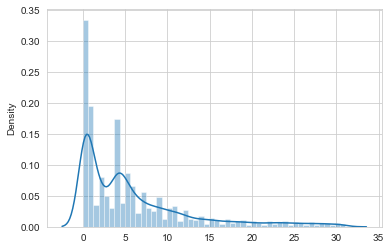

In [27]:
# VISUALIZE VARIABLES VS TARGET
y = data_no_outl.time_in_shelter_days
sns.distplot(x=y)

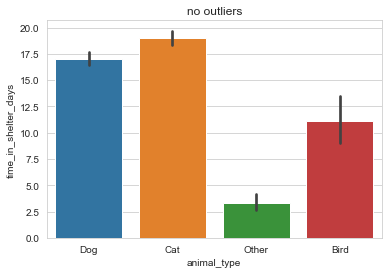

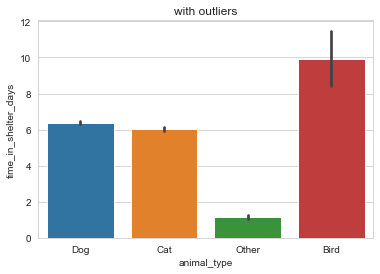

In [28]:
sns.barplot(x="animal_type", y="time_in_shelter_days", data=data) # mean of the 3 categories
plt.title("no outliers")
plt.show()
sns.barplot(x="animal_type", y="time_in_shelter_days", data=data_no_outl) # mean of the 3 categories
plt.title("with outliers")
plt.show()

In [29]:
# average time in shelter by type
print("with outliers:" ,data[["animal_type", "time_in_shelter_days"]].groupby("animal_type")["time_in_shelter_days"].mean())
print("-------------")
print("no outliers:" ,data_no_outl[["animal_type", "time_in_shelter_days"]].groupby("animal_type")["time_in_shelter_days"].mean()) 

with outliers: animal_type
Bird     11.126470
Cat      19.026451
Dog      17.038050
Other     3.297196
Name: time_in_shelter_days, dtype: float64
-------------
no outliers: animal_type
Bird     9.932701
Cat      6.032976
Dog      6.367014
Other    1.151285
Name: time_in_shelter_days, dtype: float64


# What can we see here?

In [30]:
#sns.scatterplot(x="breed", y="time_in_shelter_days", data=data)

In [31]:
#fig, ax = plt.subplots(1,1)
#sns.histplot(x="time_in_shelter_days", hue= "color", data=data, bins=400)
#ax.set_xlim((0,50))
#plt.show()

In [32]:
#sns.boxplot(cleaned_outliers_time_in_shelter_days["time_in_shelter_days"])

In [33]:
#sns.pairplot(data)

# Feature Engineering

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42691 entries, 0 to 42690
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dob_month                42691 non-null  int64  
 1   animal_type              42691 non-null  object 
 2   breed                    42691 non-null  object 
 3   color                    42691 non-null  object 
 4   intake_condition         42691 non-null  object 
 5   intake_type              42691 non-null  object 
 6   sex                      42691 non-null  object 
 7   age_upon_intake_(years)  42691 non-null  float64
 8   intake_month             42691 non-null  int64  
 9   intake_year              42691 non-null  int64  
 10  intake_weekday           42691 non-null  object 
 11  time_in_shelter_days     42691 non-null  float64
 12  outcome_month            42691 non-null  int64  
 13  outcome_weekday          42691 non-null  object 
 14  outcome_type          

In [35]:
data = data.drop(columns=["outcome_month", "outcome_weekday", "outcome_type"])  # not useful for regression

# Outlier Analysis

In [36]:
feature = "time_in_shelter_days"    # target feature                

In [37]:
# Function to scale categorical data, either with frequency encoding or dummification
def encoding(data, fe):                                          # dataset, option to use frequency encoding
    numerical = data.select_dtypes(np.number)                                         # numerical data
    categorical = data.select_dtypes(object)                                          # categorical data
    if fe:                                                                            # enable frequency encoding?
        for col in categorical.columns:
            col_enc = (data.groupby(col).size()) / len(data)                          # get relative size for each value
            categorical[col] = categorical[col].apply(lambda x : col_enc[x])          # replace values with their relative value
        categorical.columns = [str(col) + '_encode' for col in categorical.columns]   # rename columns after encoding
    else: 
        categorical = pd.get_dummies(categorical, drop_first = True)                  # if frequency encoding was not enabled
                                                                                      # dummification of features will be used
        
    data = pd.concat([numerical, categorical] , axis = 1)           # concatenate both numerical and categorical dataframes
    return data                                                     # return data

In [38]:
def model_inplace(data, feature, scaler, model):
    X = data[data.columns.drop(feature)]  # features for regression
    y = data[feature]                     # target feature         
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model.fit(X_train,y_train)
    print(scaler, model)
    print("train:", model.score(X_train, y_train))
    print("test:", model.score(X_test, y_test))
    try:
        feature_importance = pd.DataFrame({ 
        "feature_names": X.columns,
        "coefficients": abs(model.coef_)
        })
        feature_importance = feature_importance.sort_values(["coefficients"], ascending=False) # Ranking the features
    except:
        print("NO FEATURES AVAILABLE")
        return 0
    return feature_importance

In [39]:
# different scaler
stdscal = StandardScaler()
minmax = MinMaxScaler()
scaler_list = [stdscal, minmax]

#different Regresser
lreg = LinearRegression()
huber = HuberRegressor(epsilon = 1.2, alpha = 1)
ransac = RANSACRegressor(random_state = 42)
theil = TheilSenRegressor(random_state = 42)
reg_list = [lreg, huber, ransac, theil]

In [40]:
fe = False
data_enc = encoding(data, fe)
data_no_outl_enc = encoding(data_no_outl, fe)
data_list = [data_enc, data_no_outl_enc]

In [41]:
for data in data_list:
    print("NEW DATA")
    for scaler in scaler_list:
        print("")
        for reg in reg_list:
            feature_importance = model_inplace(data, feature, scaler, reg)
            print("")
            #display(feature_importance)
    print("------------------------------------")  

NEW DATA

StandardScaler() LinearRegression()
train: 0.03453377041404748
test: 0.02238935102116124

StandardScaler() HuberRegressor(alpha=1, epsilon=1.2)
train: -0.05401833575189663
test: -0.04751520912123408

StandardScaler() RANSACRegressor(random_state=42)
train: -5.1955202364912505e+23
test: -4.173366347227398e+23
NO FEATURES AVAILABLE

StandardScaler() TheilSenRegressor(random_state=42)
train: 0.01638199667499529
test: 0.012250450420737025


MinMaxScaler() LinearRegression()
train: 0.03453377041404726
test: 0.02238935102116113

MinMaxScaler() HuberRegressor(alpha=1, epsilon=1.2)
train: -0.05481930073098029
test: -0.047910157229664074

MinMaxScaler() RANSACRegressor(random_state=42)
train: -3.5709087546006524e+19
test: -2.882648120119351e+19
NO FEATURES AVAILABLE

MinMaxScaler() TheilSenRegressor(random_state=42)
train: 0.02719104577984266
test: 0.019829015935795558

------------------------------------
NEW DATA

StandardScaler() LinearRegression()
train: 0.21424768418741513
test: 

#### Score on Data without outliers ist significantly better, after this analysis we keep working with the dataset without outliers.

### Extracting data for visualization

In [42]:
#data.to_excel("Animal_Welfare_Center.xlsx", index = False)